#### Loading the data

In [2]:
!pip install opendatasets 

In [5]:
import opendatasets as od

In [8]:
dataset = 'https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata'

In [11]:
od.download(dataset)

Skipping, found downloaded files in ".\airbnbopendata" (use force=True to force download)


In [14]:
import os

In [17]:
data_dir = '.\airbnbopendata'

In [20]:
os.listdir(r'.\airbnbopendata')

['.ipynb_checkpoints']

In [23]:
import pandas as pd

In [26]:
abnb = pd.read_csv('Airbnb_Open_Data.csv') # need to move csv file to notebook folder 
abnb

C:\Users\dovbe\AppData\Local\Temp\ipykernel_40536\3010194789.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  abnb = pd.read_csv('Airbnb_Open_Data.csv') # need to move csv file to notebook folder


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN


In [438]:
abnb.isna().sum() #looking for NA in dataset


borough                            29
neighbourhood                      16
lat                                 8
long                                8
instant_bookable                  105
cancellation_policy                76
room type                           0
Construction year                 214
price                             247
service fee                       273
minimum nights                    409
number of reviews                 183
review rate number                326
calculated host listings count    319
availability 365                  448
dtype: int64

In [440]:
abnb.shape # Shape of dataset (Obs/rows, columns) 

(102599, 15)

In [442]:
drop_col = ['id', 'NAME', 'host id','host_identity_verified', 'house_rules', 'license', 'country', 'country code', 'host name', 'last review', 'reviews per month']
abnb = abnb.drop(columns = drop_col) # Removing unwanted variables
abnb.head()

KeyError: "['id', 'NAME', 'host id', 'host_identity_verified', 'house_rules', 'license', 'country', 'country code', 'host name', 'last review', 'reviews per month'] not found in axis"

In [52]:
abnb.shape

(102599, 15)

Renaming column 

In [58]:
abnb.rename(columns={'neighbourhood group': 'borough'}, inplace=True)

print(abnb)
print(abnb.columns)

          borough        neighbourhood       lat      long instant_bookable  \
0        Brooklyn           Kensington  40.64749 -73.97237            False   
1       Manhattan              Midtown  40.75362 -73.98377            False   
2       Manhattan               Harlem  40.80902 -73.94190             True   
3        Brooklyn         Clinton Hill  40.68514 -73.95976             True   
4       Manhattan          East Harlem  40.79851 -73.94399            False   
...           ...                  ...       ...       ...              ...   
102594   Brooklyn         Williamsburg  40.70862 -73.94651            False   
102595  Manhattan  Morningside Heights  40.80460 -73.96545             True   
102596   Brooklyn           Park Slope  40.67505 -73.98045             True   
102597     Queens     Long Island City  40.74989 -73.93777             True   
102598  Manhattan      Upper West Side  40.76807 -73.98342            False   

       cancellation_policy        room type  Constr

In [61]:
print(abnb['borough'].unique())

['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']


In [72]:
abnb.dtypes

borough                            object
neighbourhood                      object
lat                               float64
long                              float64
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  float64
dtype: object

Removing NA values from dataset

In [75]:
abnb_na = abnb.dropna()

In [78]:
abnb_na.isna().sum()

borough                           0
neighbourhood                     0
lat                               0
long                              0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

In [358]:
abnb_na.shape

(100337, 19)

Recoding variables to correct data type

In [86]:
abnb_na['price'] = abnb_na['price'].replace('[\$,]', '', regex=True).astype(float)
abnb_na['service fee'] = abnb_na['service fee'].replace('[\$,]', '', regex=True).astype(float)

categorical_columns = ['borough', 'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room type']
abnb_na[categorical_columns] = abnb_na[categorical_columns].astype('category')

C:\Users\dovbe\AppData\Local\Temp\ipykernel_40536\2399338671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnb_na['price'] = abnb_na['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\dovbe\AppData\Local\Temp\ipykernel_40536\2399338671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnb_na['service fee'] = abnb_na['service fee'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\dovbe\AppData\Local\Temp\ipykernel_40536\2399338671.py:5: SettingWithCopyWarning: 
A value is tryin

In [89]:
print(abnb_na.dtypes)

borough                           category
neighbourhood                     category
lat                                float64
long                               float64
instant_bookable                  category
cancellation_policy               category
room type                         category
Construction year                  float64
price                              float64
service fee                        float64
minimum nights                     float64
number of reviews                  float64
review rate number                 float64
calculated host listings count     float64
availability 365                   float64
dtype: object


In [366]:
abnb_na.shape

(100337, 19)

Getting a feel for price variable since it's the main variable in question

In [100]:
abnb_na['price'].median()

625.0

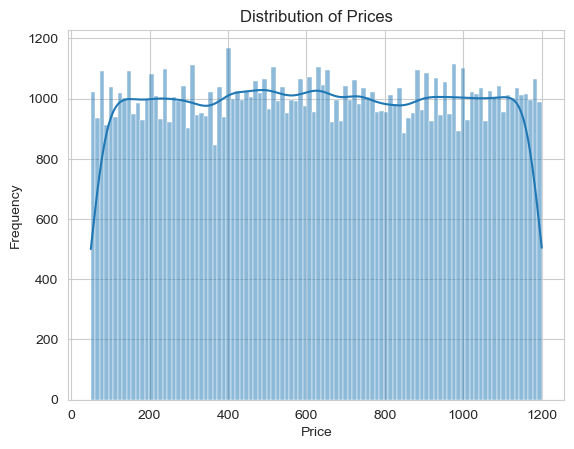

In [435]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sns.histplot(abnb_na['price'], bins = 100, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


This histogram is flat and ranges from 50-1200 dollars per night. There are no glaring issues in terms of outliers or large or small concentration of prices (high or low)

In [102]:
abnb_na.describe()

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365
count,100337.000000,100337.000000,100337.000000,100337.000000,100337.000000,100337.000000,100337.000000,100337.000000,100337.000000,100337.000000
mean,40.728047,-73.949624,2012.485653,625.386049,125.078027,8.089229,27.286634,3.280086,7.957932,140.802306
std,0.055866,0.049580,5.762363,331.703384,66.344044,28.668691,49.078112,1.284024,32.307404,135.375765
min,40.499790,-74.249840,2003.000000,50.000000,10.000000,-1223.000000,0.000000,1.000000,1.000000,-10.000000
25%,40.688720,-73.982580,2007.000000,340.000000,68.000000,2.000000,1.000000,2.000000,1.000000,3.000000
50%,40.722260,-73.954450,2012.000000,625.000000,125.000000,3.000000,7.000000,3.000000,1.000000,96.000000
75%,40.762760,-73.932320,2017.000000,913.000000,183.000000,5.000000,30.000000,4.000000,2.000000,268.000000
max,40.916970,-73.705220,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,5.000000,332.000000,3677.000000


In [316]:
numeric_stats = abnb_na.describe().transpose()

In [318]:
numeric_stats

,count,mean,std,min,25%,50%,75%,max
lat,100337.0,40.728047,0.055866,40.499790,40.688720,40.722260,40.762760,40.916970
long,100337.0,-73.949624,0.049580,-74.249840,-73.982580,-73.954450,-73.932320,-73.705220
Construction year,100337.0,2012.485653,5.762363,2003.000000,2007.000000,2012.000000,2017.000000,2022.000000
price,100337.0,625.386049,331.703384,50.000000,340.000000,625.000000,913.000000,1200.000000
service fee,100337.0,125.078027,66.344044,10.000000,68.000000,125.000000,183.000000,240.000000
minimum nights,100337.0,8.089229,28.668691,-1223.000000,2.000000,3.000000,5.000000,5645.000000
number of reviews,100337.0,27.286634,49.078112,0.000000,1.000000,7.000000,30.000000,1024.000000
review rate number,100337.0,3.280086,1.284024,1.000000,2.000000,3.000000,4.000000,5.000000
calculated host listings count,100337.0,7.957932,32.307404,1.000000,1.000000,1.000000,2.000000,332.000000
availability 365,100337.0,140.802306,135.375765,-10.000000,3.000000,96.000000,268.000000,3677.000000


In [348]:
numeric_stats.to_csv(r'C:\Users\dovbe\Notebooks\numeric_stats.csv')


In [330]:
abnb_na.columns

Index(['borough', 'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews',
       'review rate number', 'calculated host listings count',
       'availability 365', 'price_to_service_fee_ratio', 'mean_price',
       'price_index', 'price_category'],
      dtype='object')

In [360]:
abnb_na.head()

,borough,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365,price_to_service_fee_ratio,mean_price,price_index,price_category
0,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,4.0,6.0,286.0,5.005181,626.306941,1.542375,Expensive
1,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,4.0,2.0,228.0,5.071429,622.789433,0.228006,Good Value
2,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,5.0,1.0,352.0,5.000000,622.789433,0.995521,Good Value
3,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.0,1.0,322.0,4.972973,626.306941,0.587571,Good Value
4,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,3.0,1.0,289.0,4.975610,622.789433,0.327559,Good Value


In [421]:
def display_categorical_stats(data, variable):
    counts = data[variable].value_counts()
    percentages = data[variable].value_counts(normalize=True) * 100
    percentages = percentages.round(2)
    stats_df = pd.DataFrame({'Count': counts, 'Percentage': percentages})
    print(f"--- Statistics for {variable} ---")
    print(stats_df, "\n\n")


categorical_vars = ['borough', 'neighbourhood', 'instant_bookable', 'cancellation_policy', 'room type', 'price_category']


for var in categorical_vars:
    display_categorical_stats(abnb_na, var)

--- Statistics for borough ---
               Count  Percentage
borough                         
Manhattan      42813       42.67
Brooklyn       40946       40.81
Queens         12992       12.95
Bronx           2650        2.64
Staten Island    936        0.93 


--- Statistics for neighbourhood ---
                        Count  Percentage
neighbourhood                            
Bedford-Stuyvesant       7776        7.75
Williamsburg             7595        7.57
Harlem                   5316        5.30
Bushwick                 4871        4.85
Hell's Kitchen           3900        3.89
...                       ...         ...
Gerritsen Beach             3        0.00
Woodrow                     3        0.00
Glen Oaks                   2        0.00
Fort Wadsworth              2        0.00
Chelsea, Staten Island      1        0.00

[224 rows x 2 columns] 


--- Statistics for instant_bookable ---
                  Count  Percentage
instant_bookable                   
False        

In [518]:
abnb_na.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
borough,100337,5,Manhattan,42813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,100337,224,Bedford-Stuyvesant,7776,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,100337.0,NaN,NaN,NaN,40.728047,0.055866,40.49979,40.68872,40.72226,40.76276,40.91697
long,100337.0,NaN,NaN,NaN,-73.949624,0.04958,-74.24984,-73.98258,-73.95445,-73.93232,-73.70522
instant_bookable,100337,2,False,50431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cancellation_policy,100337,3,moderate,33627,NaN,NaN,NaN,NaN,NaN,NaN,NaN
room type,100337,4,Entire home/apt,52551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Construction year,100337.0,NaN,NaN,NaN,2012.485653,5.762363,2003.0,2007.0,2012.0,2017.0,2022.0
price,100337.0,NaN,NaN,NaN,625.386049,331.703384,50.0,340.0,625.0,913.0,1200.0
service fee,100337.0,NaN,NaN,NaN,125.078027,66.344044,10.0,68.0,125.0,183.0,240.0


In [104]:
abnb_na['price'].describe()

count    100337.000000
mean        625.386049
std         331.703384
min          50.000000
25%         340.000000
50%         625.000000
75%         913.000000
max        1200.000000
Name: price, dtype: float64

In [110]:
abnb_na['borough'].unique()

['Brooklyn', 'Manhattan', 'brookln', 'Staten Island', 'Bronx', 'Queens']
Categories (6, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'brookln']

In [112]:

abnb_na['borough'] = abnb_na['borough'].replace('brookln', 'Brooklyn')

print(abnb_na['borough'].unique())


['Brooklyn', 'Manhattan', 'Staten Island', 'Bronx', 'Queens']
Categories (5, object): ['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island']


C:\Users\dovbe\AppData\Local\Temp\ipykernel_40536\258498368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnb_na['borough'] = abnb_na['borough'].replace('brookln', 'Brooklyn')


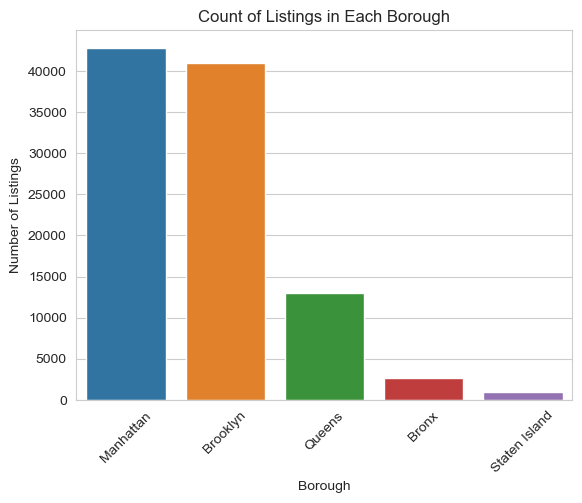

In [411]:
sns.countplot(data=abnb_na, x='borough', order=abnb_na.borough.value_counts().index)
plt.title('Count of Listings in Each Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.savefig('borough count.png', dpi=300, bbox_inches='tight')
plt.show()


In [451]:

borough_counts = abnb_na['borough'].value_counts()


borough_counts_df = pd.DataFrame(borough_counts).reset_index()
borough_counts_df.columns = ['Borough', 'Listing Count']


borough_counts_df


,Borough,Listing Count
0,Manhattan,42813
1,Brooklyn,40946
2,Queens,12992
3,Bronx,2650
4,Staten Island,936


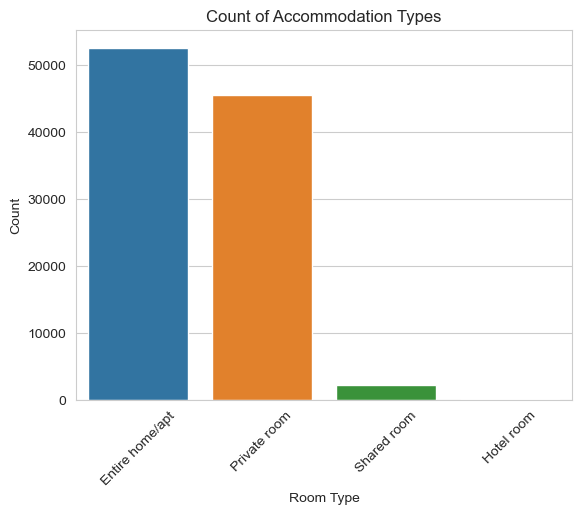

In [415]:
sns.countplot(data=abnb_na, x='room type', order=abnb_na['room type'].value_counts().index)
plt.title('Count of Accommodation Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45) 
plt.savefig('Room type count.png', dpi=300, bbox_inches='tight')
plt.show()

In [512]:

room_counts = abnb_na['room type'].value_counts()


rooms_counts_df = pd.DataFrame(room_counts).reset_index()
rooms_counts_df.columns = ['Room Type', 'Listing Count']


rooms_counts_df

,Room Type,Listing Count
0,Entire home/apt,52551
1,Private room,45498
2,Shared room,2176
3,Hotel room,112


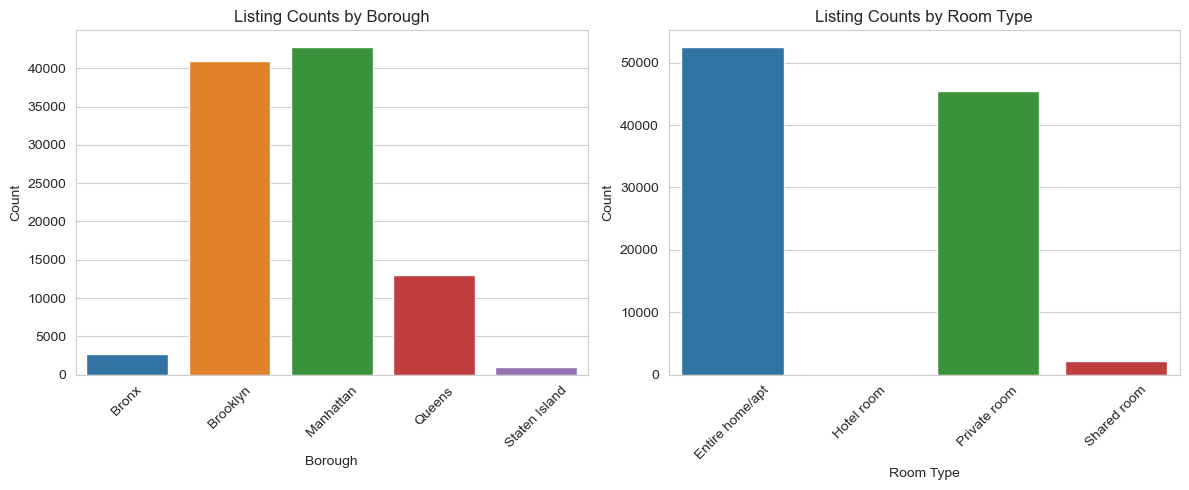

In [453]:


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))


sns.countplot(data=abnb_na, x='borough', ax=axes[0])
axes[0].set_title('Listing Counts by Borough')
axes[0].set_xlabel('Borough')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)  


sns.countplot(data=abnb_na, x='room type', ax=axes[1])
axes[1].set_title('Listing Counts by Room Type')
axes[1].set_xlabel('Room Type')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45) 


plt.tight_layout()


plt.show()


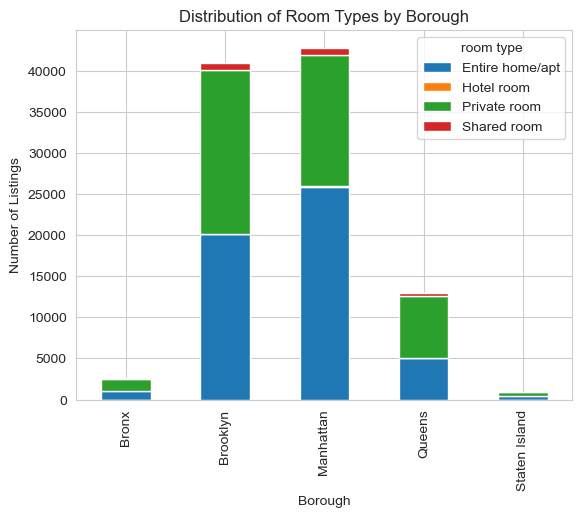

In [510]:
data = abnb_na.groupby(['borough', 'room type']).size().unstack()
data.plot(kind='bar', stacked=True)
plt.title('Distribution of Room Types by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Listings')
plt.savefig('stacked plot distrib of room type by boro', dpi=300, bbox_inches='tight')
plt.show()

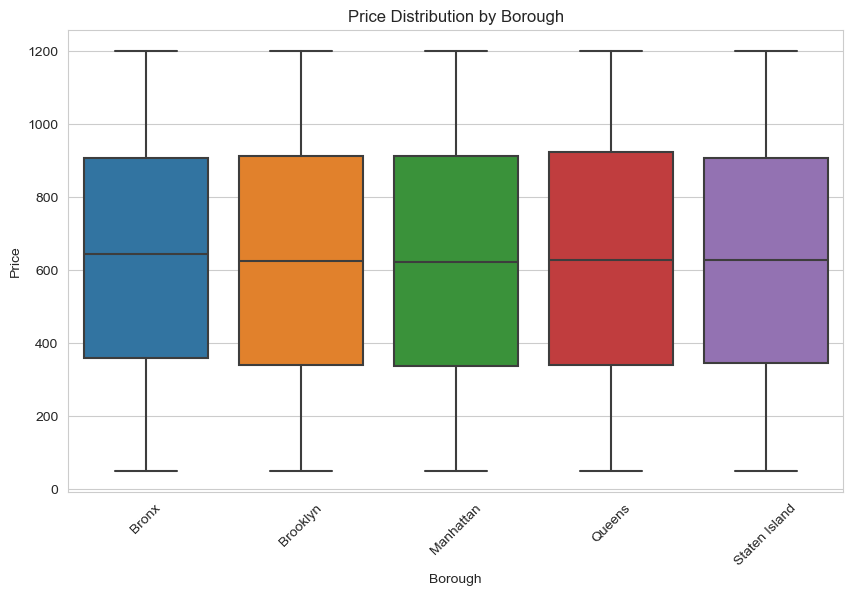

In [413]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=abnb_na, x='borough', y='price')
plt.title('Price Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Price')
plt.xticks(rotation=45) 
plt.savefig('borough price boxplot.png', dpi=300, bbox_inches='tight')
plt.show()


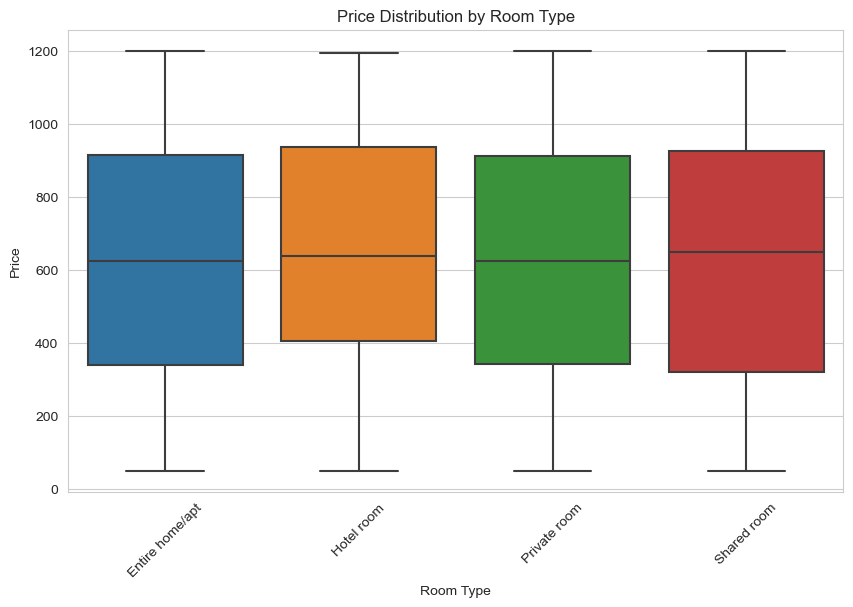

In [417]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=abnb_na, x='room type', y='price')
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.xticks(rotation=45)  
plt.savefig('Room type price boxplot.png', dpi=300, bbox_inches='tight')
plt.show()


In [429]:
average_price_by_room_type = abnb_na.groupby('room type')['price'].mean().reset_index()
average_price_by_room_type.columns = ['Room Type', 'Average Price']

average_price_by_room_type

,Room Type,Average Price
0,Entire home/apt,624.892695
1,Hotel room,665.562500
2,Private room,625.584575
3,Shared room,631.081801


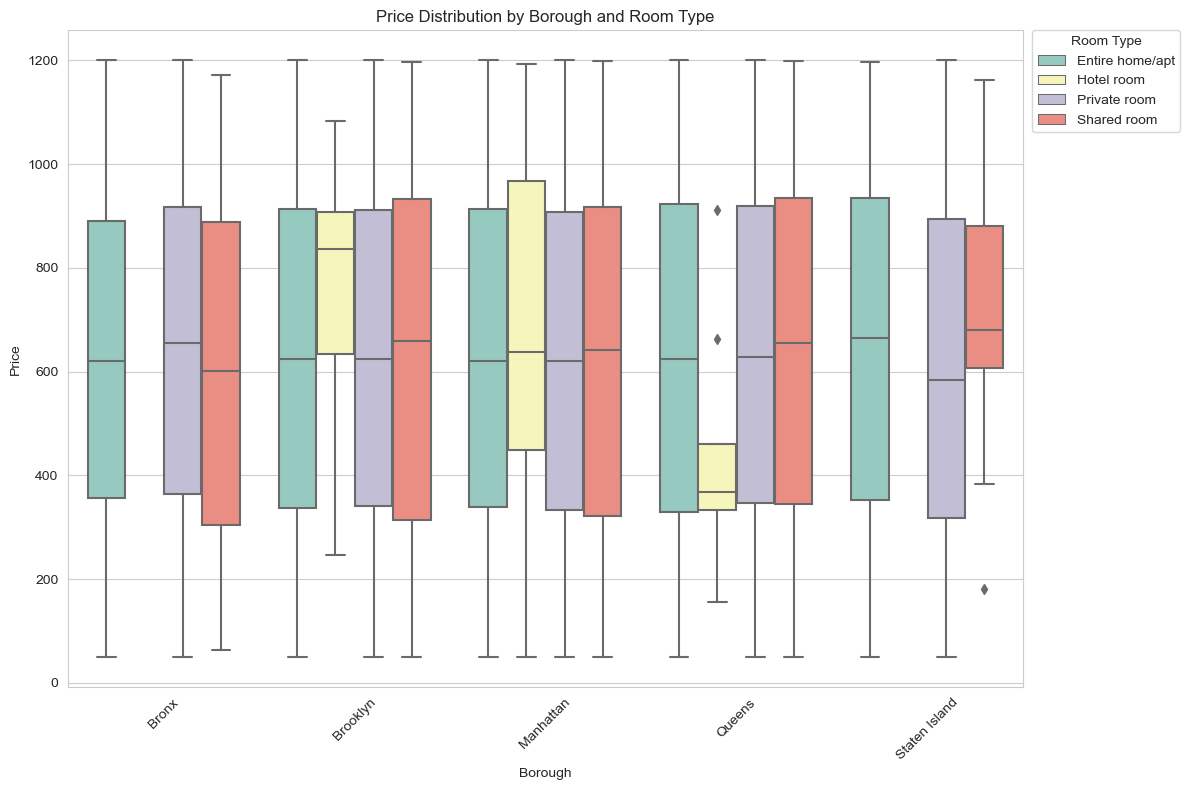

In [423]:
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(data=abnb_na, x='borough', y='price', hue='room type', palette='Set3')
plt.title('Price Distribution by Borough and Room Type')
plt.xlabel('Borough')
plt.ylabel('Price')
plt.xticks(rotation=45)  
plt.legend(title='Room Type', loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0.)

plt.savefig('price distrb boro and room type.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [425]:
avg_price_table = abnb_na.groupby(['borough', 'room type'])['price'].mean().reset_index()


avg_price_table.columns = ['Borough', 'Room Type', 'Average Price']


avg_price_table 

,Borough,Room Type,Average Price
0,Bronx,Entire home/apt,626.494461
1,Bronx,Hotel room,NaN
2,Bronx,Private room,637.105707
3,Bronx,Shared room,593.660870
4,Brooklyn,Entire home/apt,626.444704
5,Brooklyn,Hotel room,736.125000
6,Brooklyn,Private room,625.960702
7,Brooklyn,Shared room,630.397500
8,Manhattan,Entire home/apt,622.961350
9,Manhattan,Hotel room,679.041667


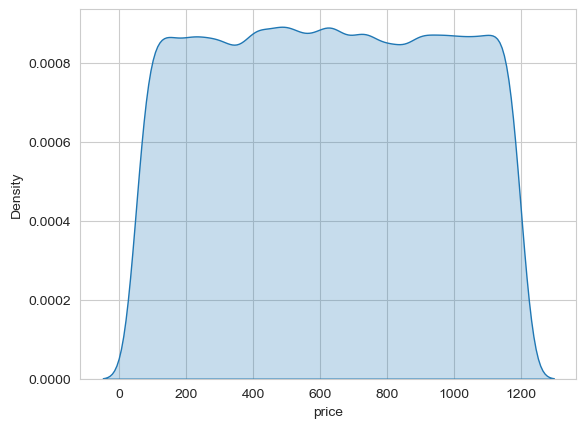

In [224]:
sns.kdeplot(abnb_na.price, bw_adjust=1, fill=True);

C:\Users\dovbe\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\dovbe\AppData\Local\Temp\ipykernel_40536\1039091073.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


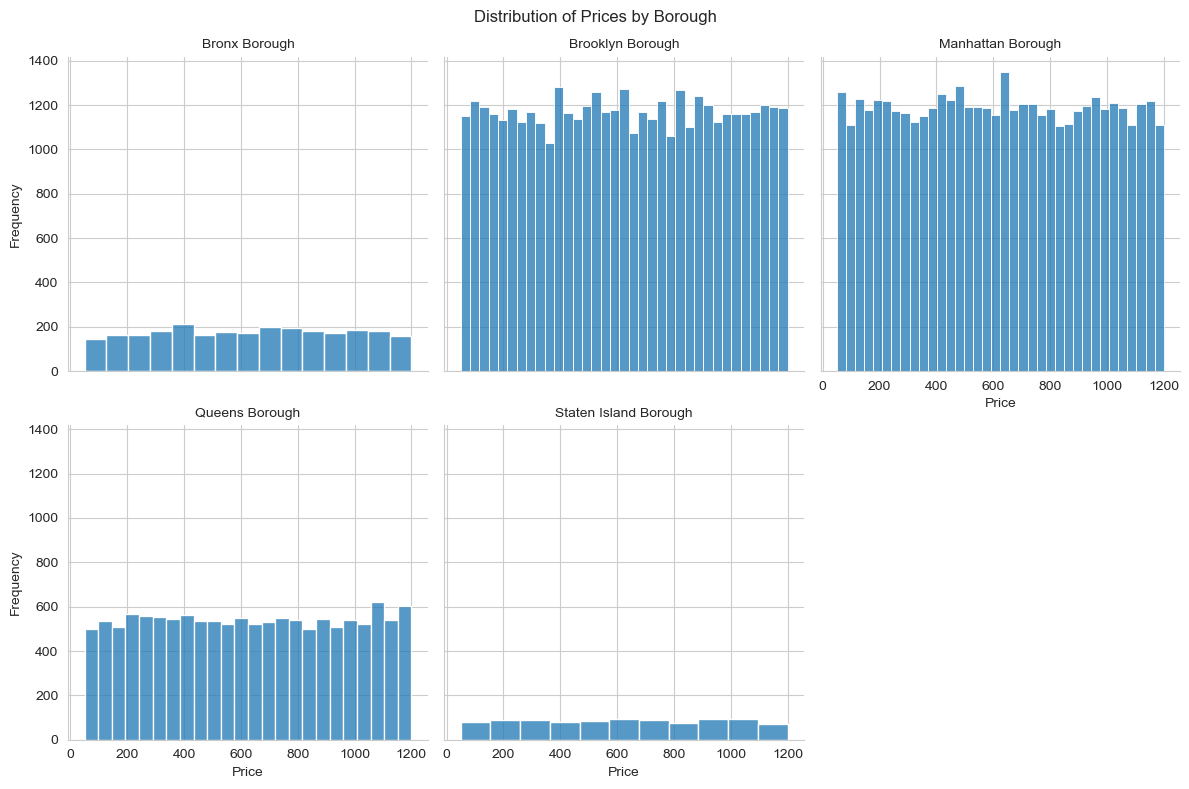

In [455]:
g = sns.FacetGrid(abnb_na, col="borough", col_wrap=3, height=4)
g.map(sns.histplot, "price")


g.set_titles("{col_name} Borough")  
g.set_axis_labels("Price", "Frequency")  
plt.subplots_adjust(top=0.9)  
g.fig.suptitle('Distribution of Prices by Borough')  
plt.tight_layout()
plt.savefig('Boro price dist.png', dpi=300, bbox_inches='tight')
plt.show()

Are there any variation/relationship between old and new listings in price?

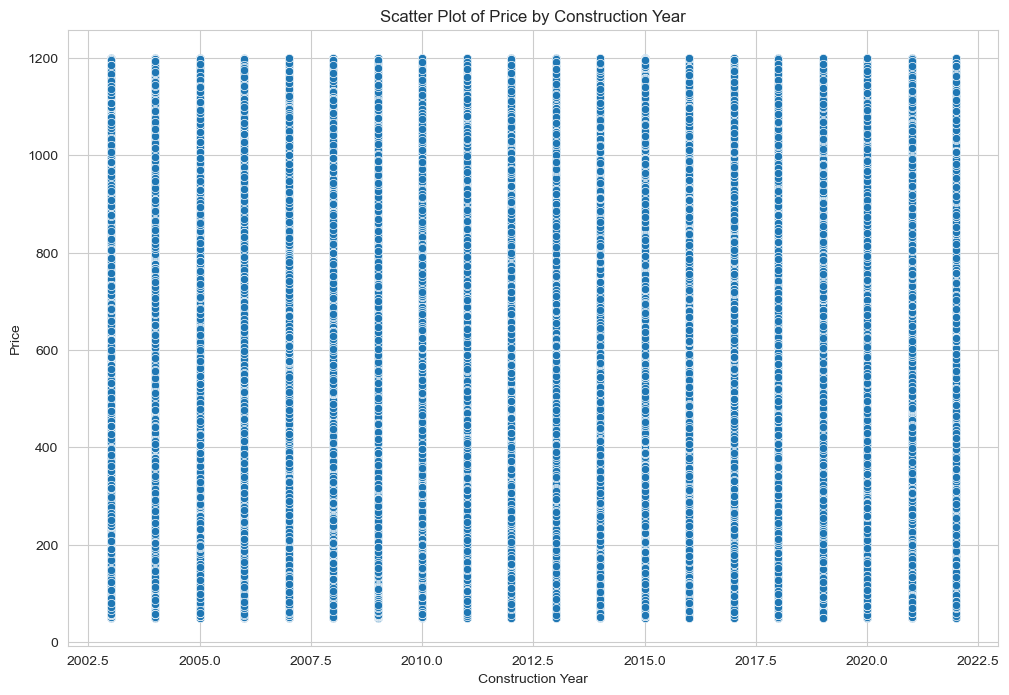

In [235]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=abnb_na, x='Construction year', y='price')
plt.title('Scatter Plot of Price by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Price')
plt.show()

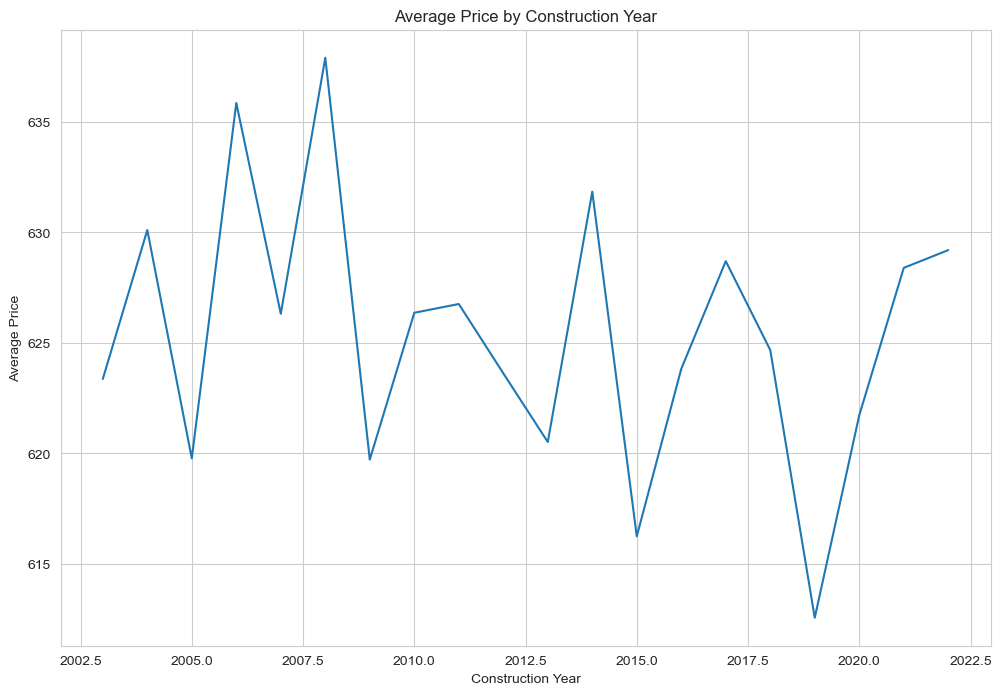

In [457]:

yearly_avg_price = abnb_na.groupby('Construction year')['price'].mean().reset_index()


plt.figure(figsize=(12, 8))
sns.lineplot(data=yearly_avg_price, x='Construction year', y='price')
plt.title('Average Price by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.savefig('avg price by const yr.png', dpi=300, bbox_inches='tight')
plt.show()


No significant difference between construction year and price

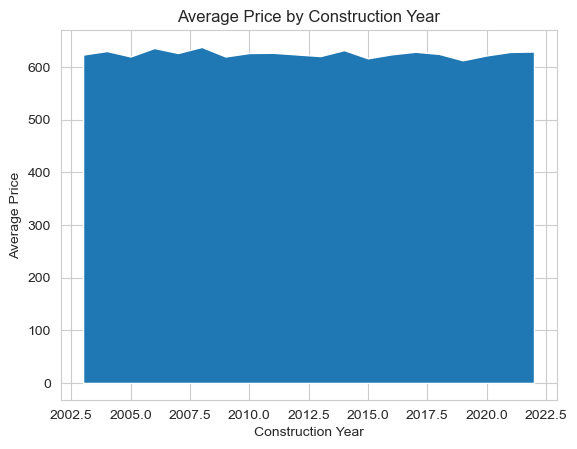

In [508]:
sorted_data = abnb_na.groupby('Construction year')['price'].mean().sort_index()
plt.fill_between(sorted_data.index, sorted_data.values)
plt.title('Average Price by Construction Year')
plt.xlabel('Construction Year')
plt.ylabel('Average Price')
plt.savefig('avg price by constr yr area plot.png', dpi=300, bbox_inches='tight')
plt.show()


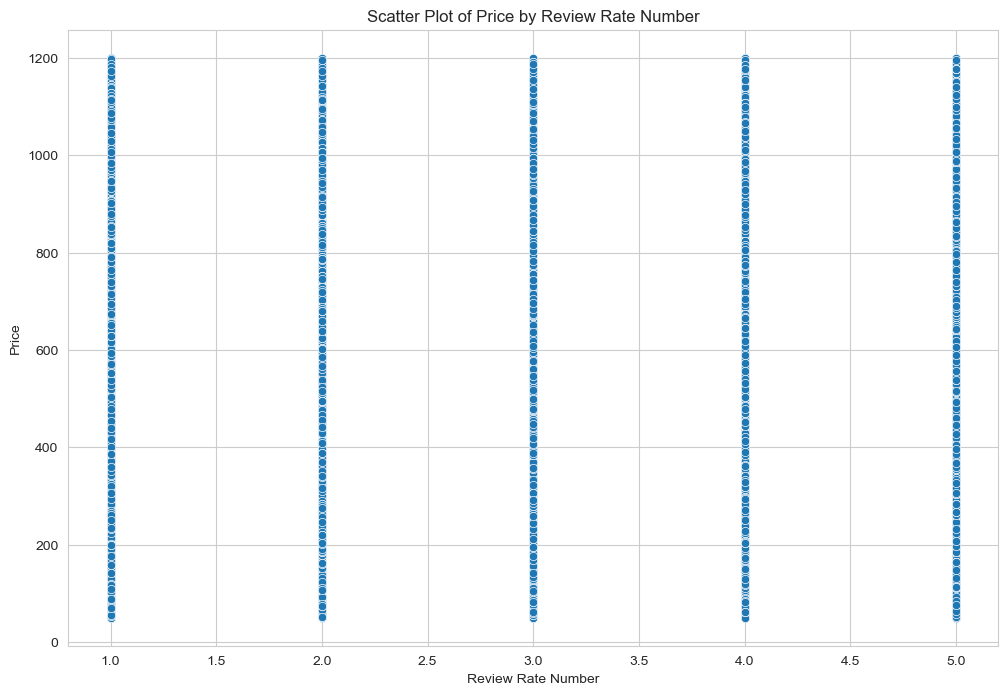

In [240]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=abnb_na, x='review rate number', y='price')
plt.title('Scatter Plot of Price by Review Rate Number')
plt.xlabel('Review Rate Number')
plt.ylabel('Price')
plt.show()

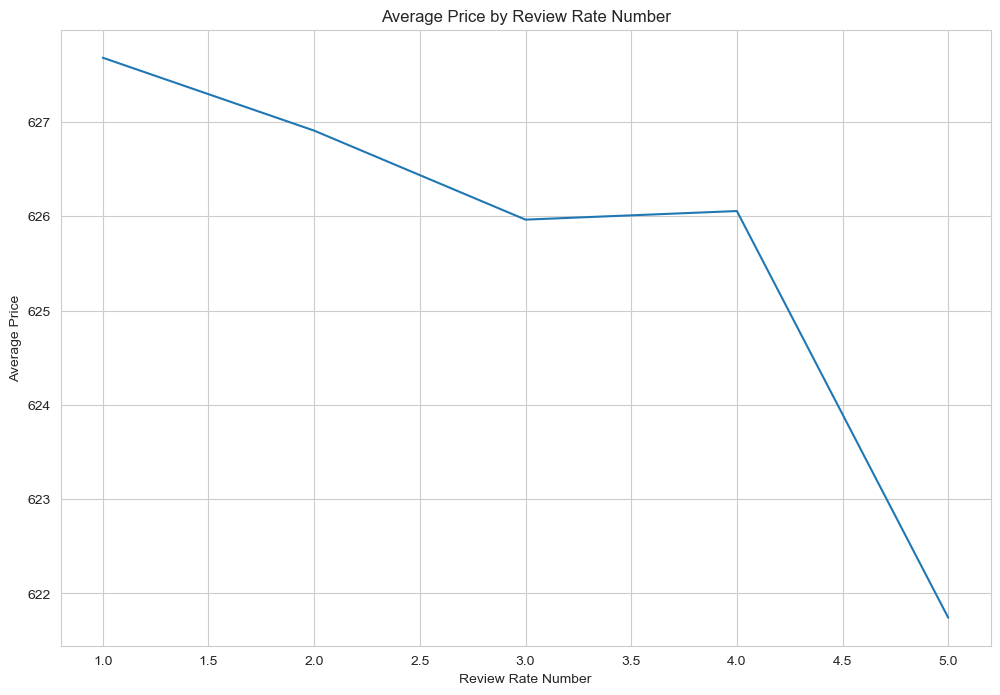

In [459]:

avg_price_by_review_rate = abnb_na.groupby('review rate number')['price'].mean().reset_index()


plt.figure(figsize=(12, 8))
sns.lineplot(data=avg_price_by_review_rate, x='review rate number', y='price')
plt.title('Average Price by Review Rate Number')
plt.xlabel('Review Rate Number')
plt.ylabel('Average Price')
plt.grid(True)
plt.savefig('avg price by review rate #.png', dpi=300, bbox_inches='tight')
plt.show()


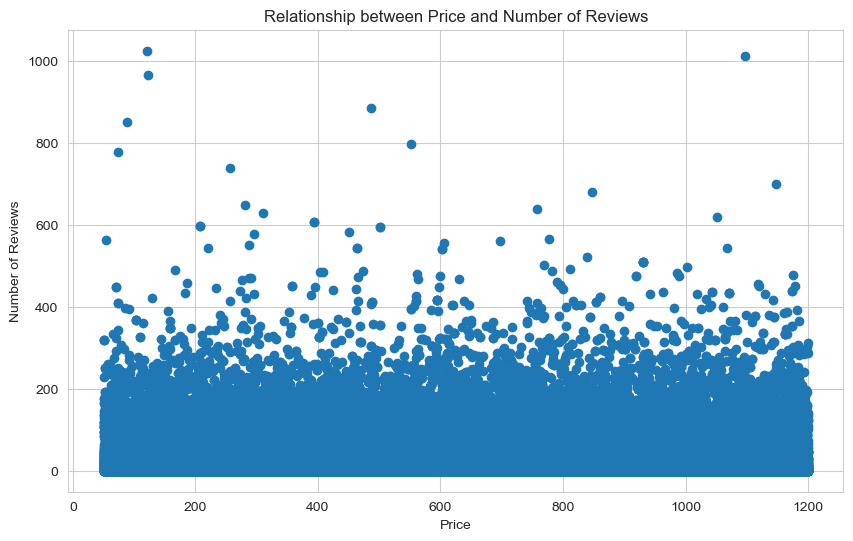

In [506]:
plt.figure(figsize=(10, 6))
plt.scatter(abnb_na['price'], abnb_na['number of reviews'])
plt.title('Relationship between Price and Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.savefig('price and # of review scatterplot.png', dpi=300, bbox_inches='tight')
plt.show()


Let's explore if there are any diffrences amoung neighborhood in Queens 

In [245]:
queens_data = abnb_na[abnb_na['borough'] == 'Queens']

In [247]:
queens_price_stats = queens_data.groupby('neighbourhood')['price'].describe()
print(queens_price_stats)

                  count        mean         std   min    25%    50%    75%  \
neighbourhood                                                                
Allerton            0.0         NaN         NaN   NaN    NaN    NaN    NaN   
Arden Heights       0.0         NaN         NaN   NaN    NaN    NaN    NaN   
Arrochar            0.0         NaN         NaN   NaN    NaN    NaN    NaN   
Arverne           221.0  647.837104  324.624091  86.0  361.0  676.0  959.0   
Astoria          1831.0  637.522665  333.085759  50.0  363.0  645.0  922.0   
...                 ...         ...         ...   ...    ...    ...    ...   
Windsor Terrace     0.0         NaN         NaN   NaN    NaN    NaN    NaN   
Woodhaven         185.0  627.816216  342.710834  51.0  316.0  636.0  910.0   
Woodlawn            0.0         NaN         NaN   NaN    NaN    NaN    NaN   
Woodrow             0.0         NaN         NaN   NaN    NaN    NaN    NaN   
Woodside          565.0  633.492035  334.899289  51.0  344.0  63

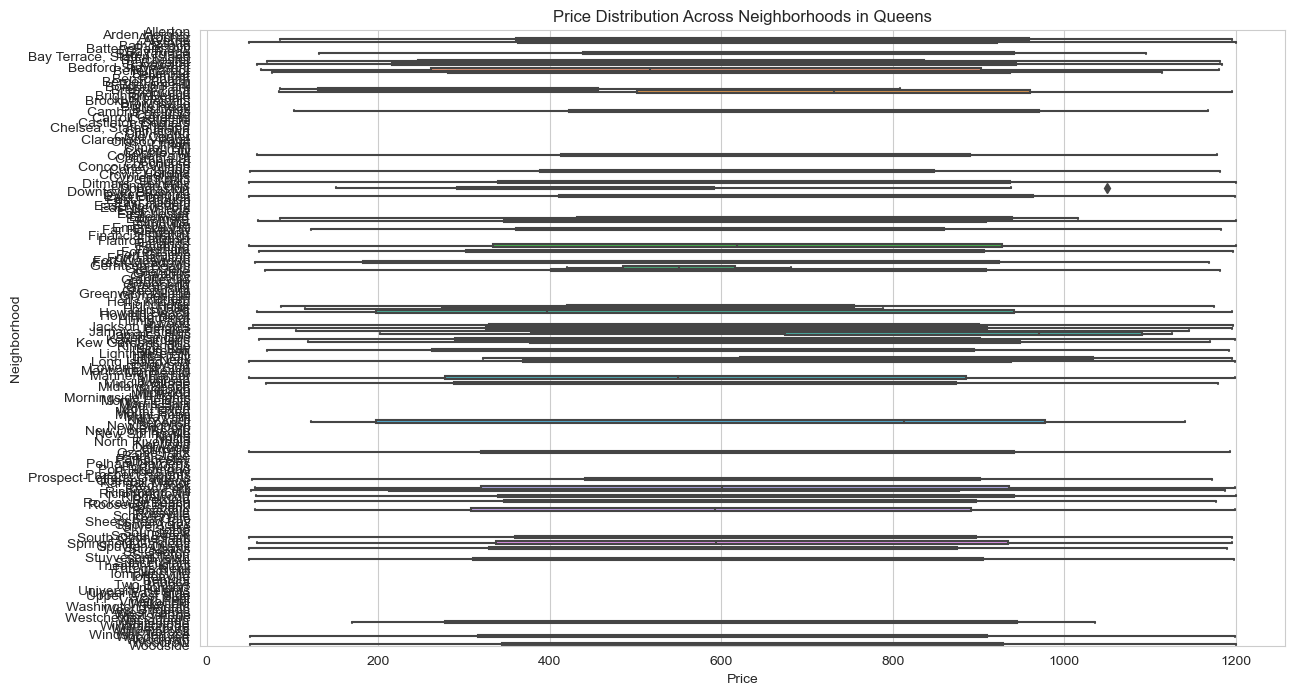

In [249]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=queens_data, x='price', y='neighbourhood')
plt.title('Price Distribution Across Neighborhoods in Queens')
plt.xlabel('Price')
plt.ylabel('Neighborhood')
plt.show()

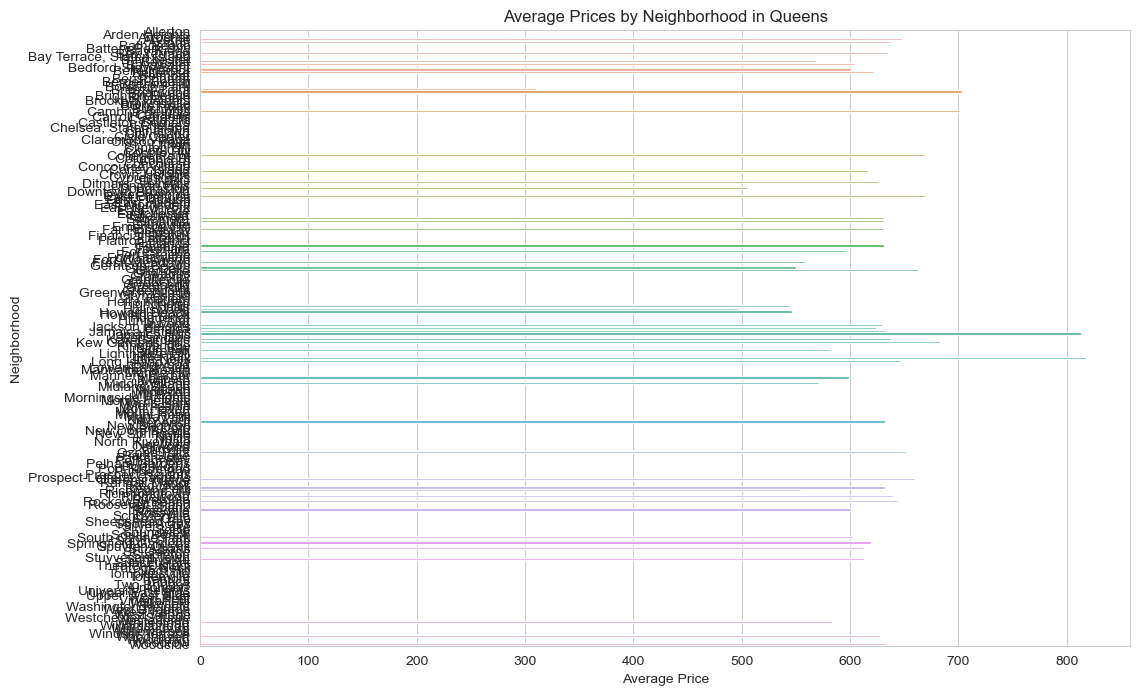

In [251]:
avg_price_by_neighborhood = queens_data.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(data=avg_price_by_neighborhood, x='price', y='neighbourhood')
plt.title('Average Prices by Neighborhood in Queens')
plt.xlabel('Average Price')
plt.ylabel('Neighborhood')
plt.show()

this is way to clutter. Let's look at Flushing

In [461]:

flushing_data = abnb_na[abnb_na['neighbourhood'] == 'Flushing']


In [463]:
flushing_price_stats = flushing_data['price'].describe()
print("Price Statistics in Flushing:", flushing_price_stats)


flushing_listing_count = flushing_data.shape[0]
print("Number of listings in Flushing:", flushing_listing_count)

Price Statistics in Flushing: count     966.000000
mean      631.083851
std       338.851976
min        50.000000
25%       333.500000
50%       618.000000
75%       927.000000
max      1200.000000
Name: price, dtype: float64
Number of listings in Flushing: 966


In [276]:
abnb_na.columns

Index(['borough', 'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews',
       'review rate number', 'calculated host listings count',
       'availability 365'],
      dtype='object')

Price to service fee ratio

Creating price to service fee ratio

In [279]:
abnb_na['price_to_service_fee_ratio'] = abnb_na['price'] / abnb_na['service fee']

C:\Users\dovbe\AppData\Local\Temp\ipykernel_40536\924454622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  abnb_na['price_to_service_fee_ratio'] = abnb_na['price'] / abnb_na['service fee']


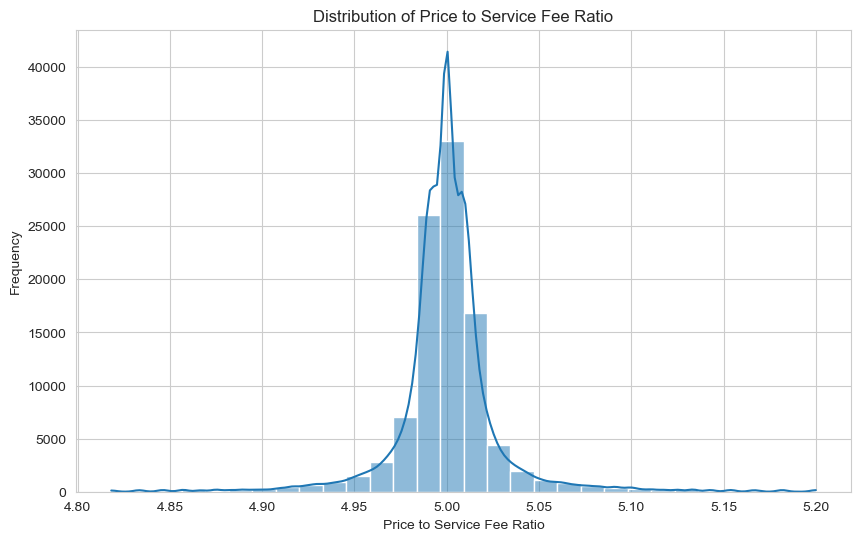

In [466]:
plt.figure(figsize=(10, 6))
sns.histplot(abnb_na['price_to_service_fee_ratio'], bins=30, kde=True)
plt.title('Distribution of Price to Service Fee Ratio')
plt.xlabel('Price to Service Fee Ratio')
plt.ylabel('Frequency')
plt.savefig('price to service fee distr.png', dpi=300, bbox_inches='tight')
plt.show()

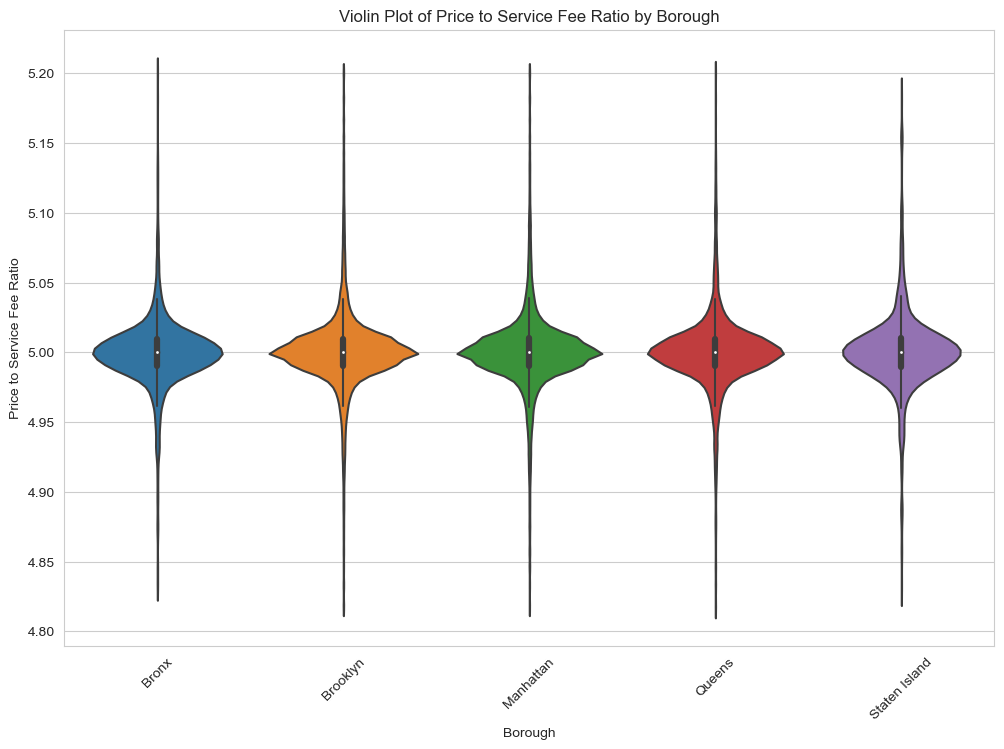

In [468]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=abnb_na, x='borough', y='price_to_service_fee_ratio')
plt.title('Violin Plot of Price to Service Fee Ratio by Borough')
plt.xlabel('Borough')
plt.ylabel('Price to Service Fee Ratio')
plt.xticks(rotation=45) 
plt.savefig('violin plot of price to service fee ratio.png', dpi=300, bbox_inches='tight')
plt.show()

Creating a price index

In [470]:

mean_prices = abnb_na.groupby('borough')['price'].mean().reset_index()
mean_prices.rename(columns={'price': 'mean_price'}, inplace=True)


abnb_na = abnb_na.merge(mean_prices, on='borough', how='left')


In [292]:
abnb_na

,borough,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365,price_to_service_fee_ratio,mean_price
0,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,966.0,193.0,10.0,9.0,4.0,6.0,286.0,5.005181,626.306941
1,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,4.0,2.0,228.0,5.071429,622.789433
2,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,620.0,124.0,3.0,0.0,5.0,1.0,352.0,5.000000,622.789433
3,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.0,1.0,322.0,4.972973,626.306941
4,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,3.0,1.0,289.0,4.975610,622.789433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100332,Brooklyn,Williamsburg,40.70862,-73.94651,False,flexible,Private room,2003.0,844.0,169.0,1.0,0.0,3.0,1.0,227.0,4.994083,626.306941
100333,Manhattan,Morningside Heights,40.80460,-73.96545,True,moderate,Private room,2016.0,837.0,167.0,1.0,1.0,2.0,2.0,395.0,5.011976,622.789433
100334,Brooklyn,Park Slope,40.67505,-73.98045,True,moderate,Private room,2009.0,988.0,198.0,3.0,0.0,5.0,1.0,342.0,4.989899,626.306941
100335,Queens,Long Island City,40.74989,-73.93777,True,strict,Entire home/apt,2015.0,546.0,109.0,2.0,5.0,3.0,1.0,386.0,5.009174,629.980219


In [295]:
abnb_na['price_index'] = abnb_na['price'] / abnb_na['mean_price']


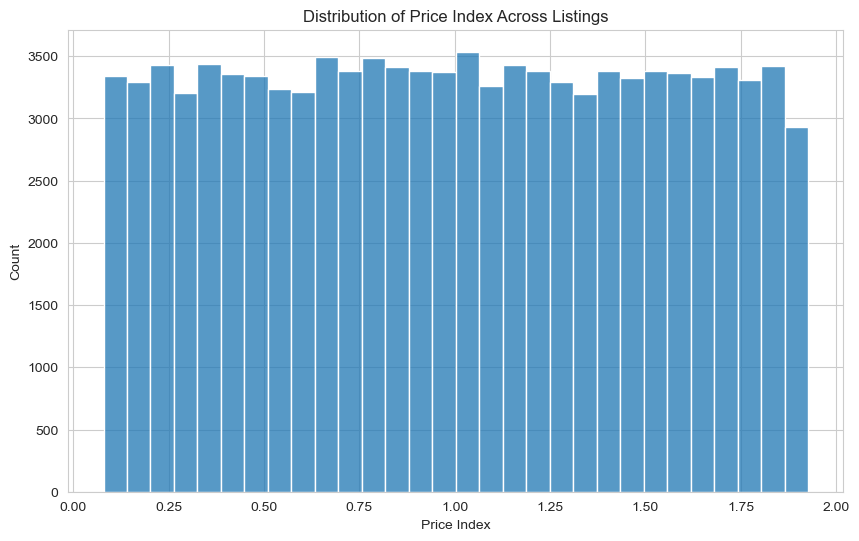

In [472]:
plt.figure(figsize=(10, 6))
sns.histplot(abnb_na['price_index'], bins=30, kde=False)
plt.title('Distribution of Price Index Across Listings')
plt.xlabel('Price Index')
plt.ylabel('Count')
plt.savefig('distrib of price index.png', dpi=300, bbox_inches='tight')
plt.show()


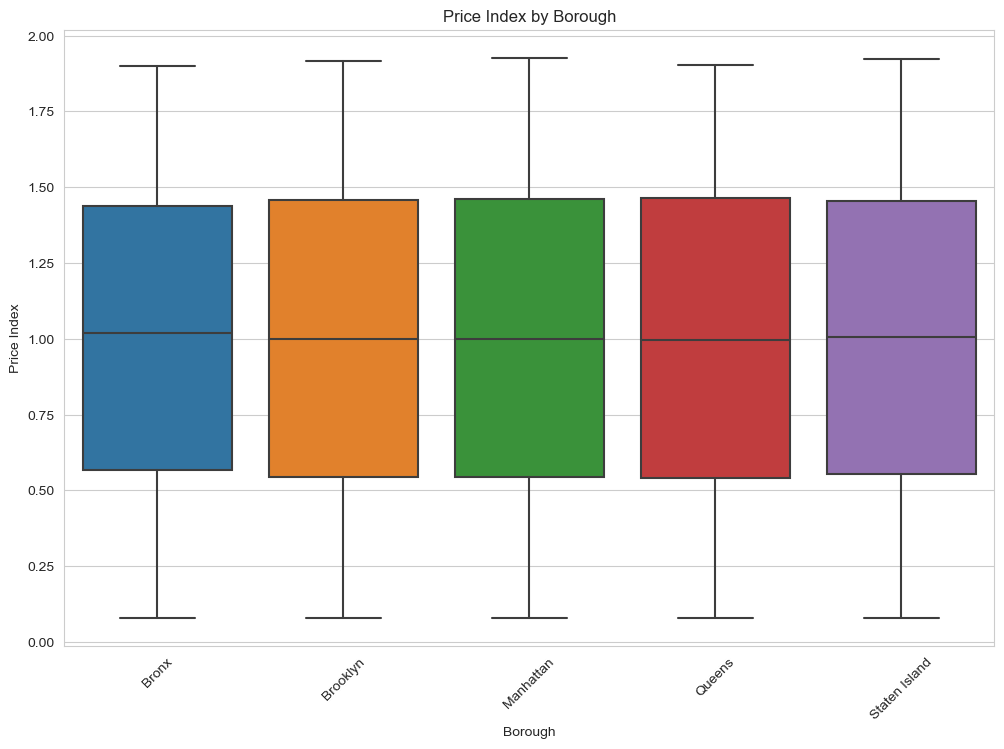

In [474]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='borough', y='price_index', data=abnb_na)
plt.title('Price Index by Borough')
plt.xlabel('Borough')
plt.ylabel('Price Index')
plt.xticks(rotation=45)
plt.savefig('boxplot of price index by borough.png', dpi=300, bbox_inches='tight')
plt.show()


Heat maps and matrix

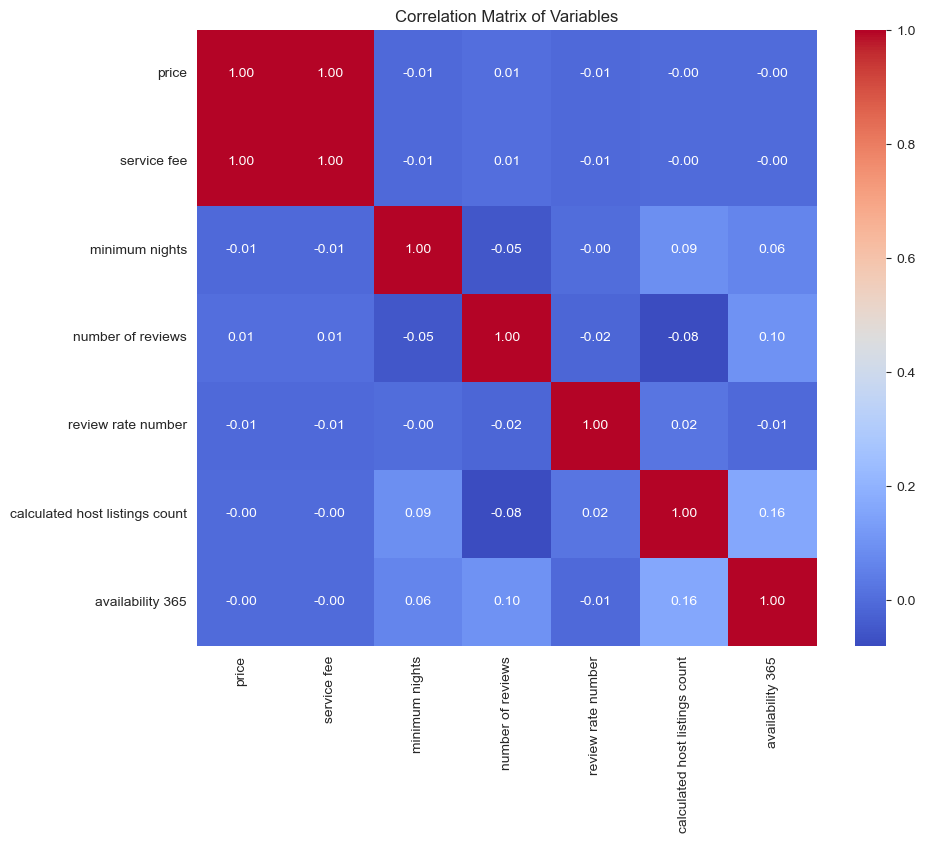

In [521]:

corr = abnb_na[['price', 'service fee', 'minimum nights', 'number of reviews', 'review rate number', 'calculated host listings count', 'availability 365']].corr()

# Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Variables')
plt.savefig('corr matrix.png', dpi=300, bbox_inches='tight')
plt.show()

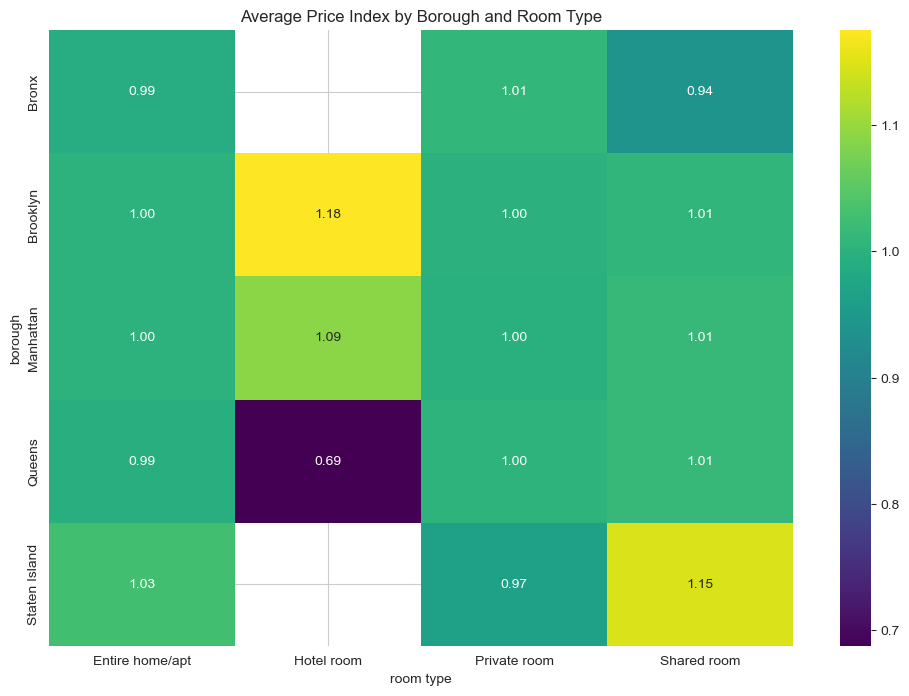

room type,Entire home/apt,Hotel room,Private room,Shared room
borough,,,,
Bronx,0.992476,NaN,1.009286,0.940462
Brooklyn,1.000220,1.175342,0.999447,1.006531
Manhattan,1.000276,1.090323,0.998186,1.014679
Queens,0.994995,0.687720,1.002999,1.014385
Staten Island,1.027752,NaN,0.966975,1.147683


In [476]:
pivot_table = abnb_na.pivot_table(values='price_index', index='borough', columns='room type', aggfunc='mean')



plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='viridis', cbar=True)
plt.title('Average Price Index by Borough and Room Type')
plt.savefig('avg price index heat map by borough and room type.png', dpi=300, bbox_inches='tight')
plt.show()
pivot_table

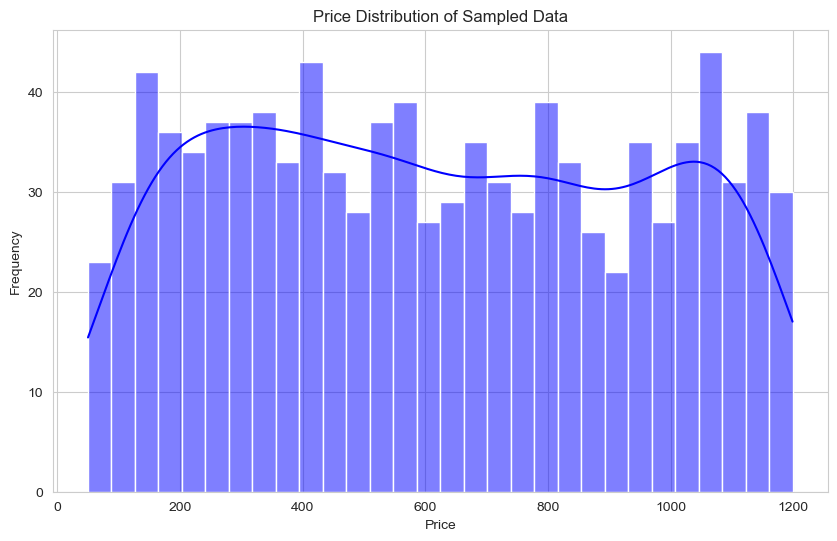

In [368]:
sampled_data = abnb_na.sample(n=1000, random_state=42)

plt.figure(figsize=(10, 6))
sns.histplot(sampled_data['price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution of Sampled Data')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [374]:
sampled_data['price'].mean()

618.471

In [376]:
sampled_data.describe()

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365,price_to_service_fee_ratio,mean_price,price_index
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,40.729509,-73.949453,2012.467000,618.471000,123.692000,9.448000,28.285000,3.234000,8.960000,148.28800,5.000600,625.268917,0.989154
std,0.054801,0.051183,5.847316,332.421776,66.493297,23.797681,49.518864,1.270771,34.926985,134.40663,0.026791,2.613223,0.531589
min,40.551700,-74.154780,2003.000000,50.000000,10.000000,1.000000,0.000000,1.000000,1.000000,-10.00000,4.818182,622.789433,0.079833
25%,40.689797,-73.983695,2007.000000,326.750000,65.000000,2.000000,2.000000,2.000000,1.000000,10.00000,4.990037,622.789433,0.522239
50%,40.722485,-73.955250,2013.000000,595.000000,119.000000,3.000000,8.000000,3.000000,1.000000,122.00000,5.000000,626.306941,0.955379
75%,40.764418,-73.934230,2017.000000,915.500000,183.000000,7.000000,31.000000,4.000000,3.000000,278.00000,5.010417,626.306941,1.469999
max,40.887400,-73.732830,2022.000000,1199.000000,240.000000,500.000000,448.000000,5.000000,327.000000,418.00000,5.133333,631.244151,1.909607


In [379]:
filtered_data = abnb_na[abnb_na['room type'] != 'Hotel room']

In [381]:
random_sample = filtered_data.sample(n=1000, random_state=42)

In [385]:
random_sample.describe()

,lat,long,Construction year,price,service fee,minimum nights,number of reviews,review rate number,calculated host listings count,availability 365,price_to_service_fee_ratio,mean_price,price_index
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,40.728887,-73.950538,2012.567000,618.970000,123.796000,7.353000,28.812000,3.253000,7.796000,142.991000,4.999286,625.308558,0.989786
std,0.055116,0.052340,5.701756,331.966391,66.396301,16.300862,50.535557,1.261183,30.895581,135.361515,0.027515,2.656349,0.530747
min,40.522240,-74.207390,2003.000000,50.000000,10.000000,1.000000,0.000000,1.000000,1.000000,-5.000000,4.818182,622.789433,0.080284
25%,40.688897,-73.984287,2008.000000,333.750000,67.000000,1.000000,1.000000,2.000000,1.000000,0.000000,4.990244,622.789433,0.533235
50%,40.726505,-73.956100,2013.000000,617.500000,123.500000,3.000000,7.000000,3.000000,1.000000,116.500000,5.000000,626.306941,0.987833
75%,40.763843,-73.933920,2017.000000,912.250000,182.250000,5.000000,34.000000,4.000000,2.000000,269.250000,5.009662,626.306941,1.452337
max,40.898420,-73.716900,2022.000000,1199.000000,240.000000,365.000000,510.000000,5.000000,327.000000,424.000000,5.133333,631.244151,1.914397


In [488]:
abnb_na.columns

Index(['borough', 'neighbourhood', 'lat', 'long', 'instant_bookable',
       'cancellation_policy', 'room type', 'Construction year', 'price',
       'service fee', 'minimum nights', 'number of reviews',
       'review rate number', 'calculated host listings count',
       'availability 365', 'price_to_service_fee_ratio', 'mean_price_x',
       'price_index', 'price_category', 'mean_price_y'],
      dtype='object')